dict_keys(['ID', 'NR', 'SW', 'INT_DESI', 'SATNO', 'NA', 'TY', 'CL', 'ABC', 'MASS', 'DIAMTR', 'SMA', 'ECC', 'INC', 'RAAN', 'AOP', 'TANO', 'DC', 'RCSFAC', 'RPOP1', 'RPOP2', 'SEED', 'Breakup Epoch', 'Launch Epoch', 'Perigee Altitude', 'Apogee Altitude'])
dict_keys(['ID', 'NR', 'SW', 'INT_DESI', 'SATNO', 'NA', 'TY', 'CL', 'ABC', 'MASS', 'DIAMTR', 'SMA', 'ECC', 'INC', 'RAAN', 'AOP', 'TANO', 'DC', 'RCSFAC', 'RPOP1', 'RPOP2', 'SEED', 'Breakup Epoch', 'Launch Epoch', 'Perigee Altitude', 'Apogee Altitude'])


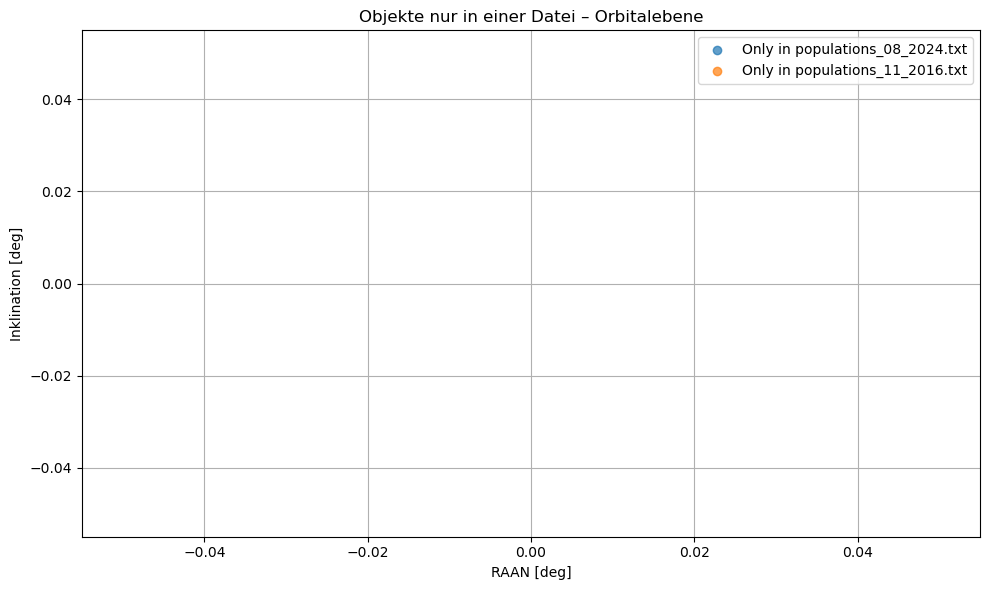

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def compare_files(file1_path: str, file2_path: str):
    data1 = read_breakup_event_file(file1_path)
    data2 = read_breakup_event_file(file2_path)

    int_desi_1 = set(data1["INT_DESI"])
    int_desi_2 = set(data2["INT_DESI"])

    only_in_file1 = int_desi_1 - int_desi_2
    only_in_file2 = int_desi_2 - int_desi_1

    result = []
    for desi in only_in_file1:
        result.append((desi, "only in " + file1_path))
    for desi in only_in_file2:
        result.append((desi, "only in " + file2_path))

    return result


def read_breakup_event_file(filename: str):
    colspecs = [
        (0, 5), (5, 10), (10, 14), (14, 23), (23, 33),
        (33, 37), (37, 41), (41, 45), (45, 50), (50, 59),
        (59, 68), (68, 77), (77, 85), (85, 93), (93, 102),
        (102, 111), (111, 120), (120, 126), (126, 135), (135, 143),
        (143, 151), (151, 158), (158, 184), (184, 210), (210, 231), (231, 252)
    ]

    column_names = [
        "ID", "NR", "SW", "INT_DESI", "SATNO", "NA", "TY", "CL", "ABC", "MASS",
        "DIAMTR", "SMA", "ECC", "INC", "RAAN", "AOP", "TANO", "DC", "RCSFAC", "RPOP1",
        "RPOP2", "SEED", "Breakup Epoch", "Launch Epoch", "Perigee Altitude", "Apogee Altitude"
    ]

    df = pd.read_fwf(filename, colspecs=colspecs, names=column_names, skiprows=1, comment='=')
    return df.to_dict(orient='list')

data_11_2016 = read_breakup_event_file("populations_11_2016.txt")
data_08_2024 = read_breakup_event_file("populations_08_2024.txt")

print(data_11_2016.keys())
print(data_08_2024.keys())
int_desi_11_2016 = data_11_2016["INT_DESI"]
int_desi_08_2024 = data_08_2024["INT_DESI"]

data_08_2024 = read_breakup_event_file("populations_08_2024.txt")
compare_files("populations_08_2024.txt", "populations_11_2016.txt")

def plot_orbital_differences(file1_path: str, file2_path: str):
    data1 = read_breakup_event_file(file1_path)
    data2 = read_breakup_event_file(file2_path)

    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)

    set1 = set(df1["INT_DESI"])
    set2 = set(df2["INT_DESI"])

    only_in_1 = set1 - set2
    only_in_2 = set2 - set1

    df1_unique = df1[df1["INT_DESI"].isin(only_in_1)].copy()
    df2_unique = df2[df2["INT_DESI"].isin(only_in_2)].copy()

    # Konvertiere Spalten zu float
    df1_unique["RAAN"] = pd.to_numeric(df1_unique["RAAN"], errors="coerce")
    df1_unique["INC"] = pd.to_numeric(df1_unique["INC"], errors="coerce")
    df2_unique["RAAN"] = pd.to_numeric(df2_unique["RAAN"], errors="coerce")
    df2_unique["INC"] = pd.to_numeric(df2_unique["INC"], errors="coerce")

    plt.figure(figsize=(10, 6))
    plt.scatter(df1_unique["RAAN"], df1_unique["INC"], label=f"Only in {file1_path}", alpha=0.7, color="tab:blue")
    plt.scatter(df2_unique["RAAN"], df2_unique["INC"], label=f"Only in {file2_path}", alpha=0.7, color="tab:orange")

    plt.xlabel("RAAN [deg]")
    plt.ylabel("Inklination [deg]")
    plt.title("Objekte nur in einer Datei – Orbitalebene")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_orbital_differences("populations_08_2024.txt", "populations_11_2016.txt")

FALSCHHHHH